<a href="https://colab.research.google.com/github/icarocarmona/tech_challenge_f1/blob/main/Analise_Produ%C3%A7%C3%A3o_de_Vinho_de_Mesa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# adicionar aqui as importações
import pandas as pd

In [16]:
pip install seaborn

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
tabela = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/raw/Producao.csv', sep=';')

Em 2019  a produção de uva no Rio Grande do Sul cai quase 40% frente a 2018, a redução foi causada, principalmente, pela queda de granizo que comprometeu parreirais em municípios da Serra Gaúcha.

Já em em 2020 a exportação de vinho brasileiro bate recorde de janeiro a setembro de 2021, o vinho brasileiro foram comprados por 63 países entre janeiro e setembro de 2021. A taxa de aumento da produção de vinho foi de aproximadamente 38.7% de 2020 para 2021 e de cerca de 11.6% de 2021 para 2022.

In [20]:
# Vamos usar o método "melt" para reorganizar a tabela

# Primeiro, crie uma lista de anos das colunas da tabela
anos = [str(ano) for ano in range(2018, 2023)]

# Use o método "melt" para transformar a tabela
tabela_melted = tabela.melt(id_vars=["id", "produto"], value_vars=anos, var_name="Ano", value_name="Quantidade (L)")

# Agora, você tem uma tabela tidy que pode ser usada para criar gráficos
print(tabela_melted.head())


   id                        produto   Ano  Quantidade (L)
0   1                  VINHO DE MESA  2018       218375636
1   2                          Tinto  2018       188270142
2   3                         Branco  2018        29229970
3   4                         Rosado  2018          875524
4   5  VINHO FINO DE MESA (VINÍFERA)  2018        38707220


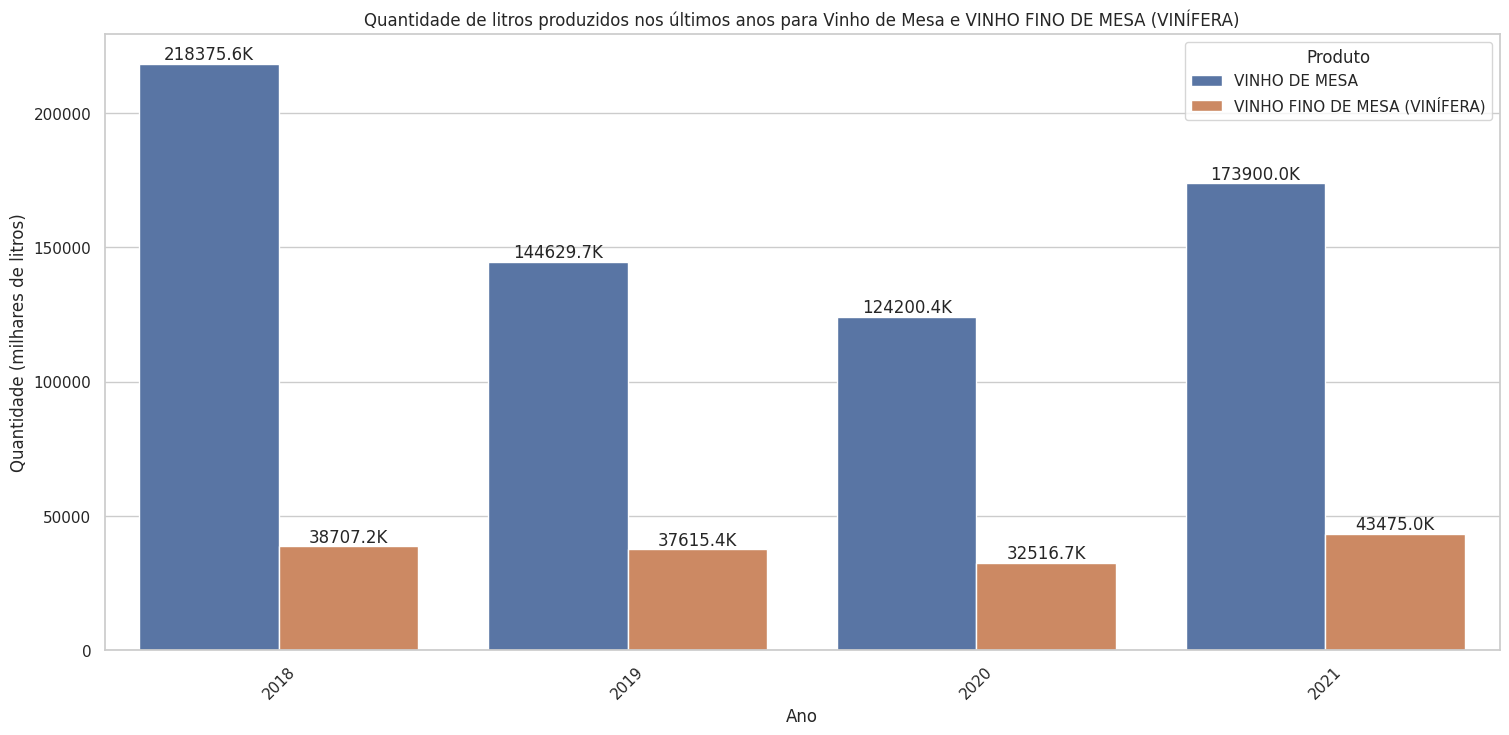

In [21]:

# Filtrar linhas para "Vinho de Mesa" e "VINHO FINO DE MESA (VINÍFERA)"
produtos_desejados = tabela_melted[tabela_melted['produto'].isin(["VINHO DE MESA", "VINHO FINO DE MESA (VINÍFERA)"])]

# Filtrar apenas os 4 anos mais recentes
anos_recentes = [str(ano) for ano in range(2018, 2022)]  # 2018 a 2022
produtos_desejados = produtos_desejados[produtos_desejados['Ano'].isin(anos_recentes)]

# Normalizar as quantidades (dividir por 1.000)
produtos_desejados.loc[:, 'Quantidade (L)'] = produtos_desejados['Quantidade (L)'] / 1000

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
ax = sns.barplot(data=produtos_desejados, x="Ano", y="Quantidade (L)", hue="produto")

# Adicionar rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


plt.title("Quantidade de litros produzidos nos últimos anos para Vinho de Mesa e VINHO FINO DE MESA (VINÍFERA)")
plt.xlabel("Ano")
plt.ylabel("Quantidade (milhares de litros)")
plt.xticks(rotation=45)
plt.legend(title="Produto")

plt.show()
